In [16]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Define parameters
batch_size = 16
img_height = 460
img_width = 700
epochs = 20
learning_rate = 0.0001

In [18]:
train_dir = 'Breast_Cancer_DataSet/Train'
validation_dir = 'Breast_Cancer_DataSet/valid'
test_dir = 'Breast_Cancer_DataSet/Test'

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 808 files belonging to 2 classes.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels='inferred',
    label_mode='binary',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 189 files belonging to 2 classes.


In [21]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    seed=42,
    image_size=(img_height, img_width),
)

Found 129 files belonging to 2 classes.


In [22]:
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ['Benign', 'Malignant']


In [23]:
AUTOTUNE = tf.data.AUTOTUNE

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    normalization_layer,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 460, 700, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 460, 700, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 458, 698, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 458, 698, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 229, 349, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 227, 347, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 227, 347, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 113, 173, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 111, 171, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 111, 171, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 55, 85, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 53, 83, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 53, 83, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 41, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456,385 (1.74 MB)

 Trainable params: 455,425 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [30]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 10727s 214s/step - accuracy: 0.7036 - loss: 0.5571 - val_accuracy: 0.4868 - val_loss: 0.7139
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 561s 11s/step - accuracy: 0.8829 - loss: 0.2894 - val_accuracy: 0.4868 - val_loss: 0.8286
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 803s 16s/step - accuracy: 0.8904 - loss: 0.2401 - val_accuracy: 0.4868 - val_loss: 1.0069
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 21294s 426s/step - accuracy: 0.8690 - loss: 0.2719 - val_accuracy: 0.4868 - val_loss: 1.1593
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 18671s 373s/step - accuracy: 0.8863 - loss: 0.2410 - val_accuracy: 0.4868 - val_loss: 1.4791
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 639s 12s/step - accuracy: 0.9269 - loss: 0.1720 - val_accuracy: 0.4868 - val_loss: 1.3342
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 678s 13s/step - accuracy: 0.9114 - loss: 0.2068 - val_accuracy: 0.4868 - val_loss: 1.7279
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 941s 19s/step - accuracy: 0.9265 - loss: 0.1717 - val_acc

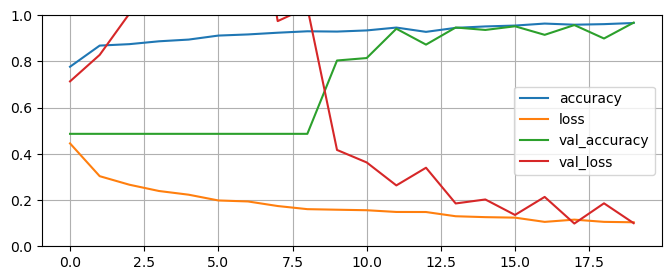

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9000 - loss: 0.4605
Test Accuracy: 89.92%
Test Loss: 44.77%


In [34]:
model.save('breast_cancer_model.keras')

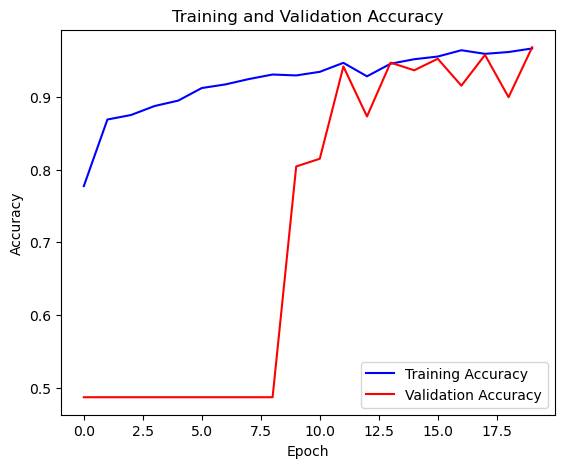

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [37]:
def predict_image(model, img_path, class_names):
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_arrat = tf.keras.preprocessing.img_to_array(img)
    img_array = tf.expand_dims(img_array, o)

    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    score = predictions[0][0]
    if score < 0.5:
        predicted_class = class_name[0]
        confidnece = (1 - score) * 100
    else:
        predicted_class = class_names[1]
        confidence = score * 100
    print(f"The image '{os.path.basename(img_path)}' is classified as '{predicted_class}' with {confidence:.2f}% confidence.")


    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()